# Imports

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib

# from noise import pnoise2
# from perlin_noise import PerlinNoise

# Noise test

In [ ]:
# import cv2
# import numpy as np

# # Read the input image
# img = cv2.imread('l-system-3-iterations.png', 0)
# plt.imshow(img)

# # Define the kernel
# kernel = np.ones((5, 5), np.uint8)

# # Apply dilation
# img_dilation = cv2.erode(img, kernel, iterations=1)

# plt.imshow(img_dilation)

In [ ]:
# Generate a 2D grid of Perlin noise
image = cv2.imread('l-system-3-iterations-dilated.png', cv2.IMREAD_GRAYSCALE)
height, width = image.shape

scale = 12
grid = [[pnoise2(i/scale, j/scale, octaves = 4, persistence = 0.01, lacunarity = 3) for j in range(height)] for i in range(width)]
grid = np.array(grid)

perlin_noise = cv2.normalize(grid, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
noisy_image = cv2.addWeighted(image, 0.5, perlin_noise, 0.5, 0)
# Visualize the noise
plt.imshow(noisy_image, cmap='gray')

In [ ]:
noise = PerlinNoise(octaves=8, seed=42)

grid = [[noise([i/width, j/height]) for j in range(height)] for i in range(width)]
grid = np.array(grid)
perlin_noise = cv2.normalize(grid, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
noisy_image = cv2.addWeighted(image, 0.3, perlin_noise, 0.7, 0)
plt.imshow(noisy_image, cmap='gray')

In [ ]:
import opensimplex
opensimplex.seed(42)

grid = [[opensimplex.noise2(i, j) for j in range(height)] for i in range(width)]
grid = np.array(grid)
simplex_noise = cv2.normalize(grid, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
noisy_image = cv2.addWeighted(image, 0.3, simplex_noise, 0.7, 0)
plt.imshow(noisy_image, cmap='gray')
# n = opensimplex.noise2(x=10, y=10)
# print(n)

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt


class Point2D:
    def __init__(self, x, y):
        self.p = [x, y]

    def x(self):
        return (self.p[0])

    def y(self):
        return (self.p[1])

    def distance(point1, point2):
        import math
        return (math.sqrt((point1.x() - point2.x()) ** 2 + (point1.y() - point2.y()) ** 2))

    def getDistances(origin, li: list):
        distances = []
        for ll in li:
            distances.append(Point2D.distance(origin, Point2D(ll[0], ll[1])))
        return (distances)


class WorleyNoise:

    def __init__(self, height, width, density):

        self.height = height
        self.width = width
        self.density = density

    def auto(self, option):

        self.generatePoints()
        start = time.time()
        self.broadcastCalculateNoise(option)
        end = time.time()
        print("total time : " + str(end - start) + " seconds")
        self.showNoise()

    def generatePoints(self):
        self.points = []
        for _ in range(self.density):
            self.points.append([np.random.randint(0, self.width, 1)[0], np.random.randint(0, self.height, 1)[0]])

    def showPoints(self):
        plt.scatter([self.points[i][0] for i in range(len(self.points))],
                    [self.points[l][1] for l in range(len(self.points))])
        plt.show()

    def broadcastCalculateNoise(self, option):
        # casting points to numpy, it is of shape (nb_point, 2)
        points = np.array(self.points)
        # simple array of x and y coordinates for each coordinate
        xs = np.arange(self.width)
        ys = np.arange(self.height)
        # use the previously computed xs to get point.x - x for each x
        # notice the use of np.newaxis to control the broadcasting of the result to
        # an array of shape (nb_point, width)
        x_dist = np.power(points[:, 0, np.newaxis] - xs, 2)
        # same for ys, giving a (nb_point, height) shaped array
        y_dist = np.power(points[:, 1, np.newaxis] - ys, 2)
        # use the two last array to compute distance : sqrt((p.x - x) ** 2 + (.y - y ) ** 2))
        d = np.sqrt(x_dist[:, :, np.newaxis] + y_dist[:, np.newaxis, :])
        # d is of shape (nb_point, width, height), but we must sort it along the first axis
        distances = np.sort(d, axis=0)
        self.data = distances[option]

    def showNoise(self):
        import matplotlib.pyplot as plt
        plt.imshow(self.data, cmap="gray")
        plt.show()


w = WorleyNoise(height=height, width=width, density=50)
w.auto(0)

In [ ]:
worley_noise = cv2.normalize(w.data, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
noisy_image = cv2.addWeighted(image, 0.3, worley_noise, 0.7, 0)
plt.imshow(noisy_image, cmap='gray')

In [ ]:
volume = np.load("l_systems_builder/examples/volumes/bush_tree.npy")

In [ ]:
volume.nonzero()
z,x,y = volume.nonzero()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, zdir='z', c= 'red')
plt.ion()
plt.show()

In [ ]:
def visualize_voxel_slices(voxel_grid: np.ndarray, num_slices: int = 6):
        """
        Visualize evenly spaced slices from the voxel grid.
        Bottom slice (z=0) should show the stem.
        
        Args:
            voxel_grid: 3D numpy array (W, H, D)
            num_slices: Number of slices to display
        """
        W, H, D = voxel_grid.shape
        slice_indices = np.linspace(0, D-1, num_slices, dtype=int)
        
        fig, axes = plt.subplots(1, num_slices, figsize=(3*num_slices, 3))
        
        for i, z_idx in enumerate(slice_indices):
            slice_2d = voxel_grid[:,:,z_idx]
            axes[i].imshow(slice_2d.T, cmap='gray', origin='lower')
            axes[i].set_title(f'Slice z={z_idx}\n({slice_2d.sum()} voxels)')
            axes[i].axis('off')
        
        plt.suptitle('Voxel Grid Slices (z=0 is bottom)', fontsize=14)
        plt.tight_layout()
        plt.show()    

In [ ]:
volume = np.load("root_volume_longZ.npy")

In [ ]:
volume.shape

In [ ]:
visualize_voxel_slices(volume, num_slices=6)

In [ ]:
import numpy as np
from skimage.morphology import binary_dilation, disk

# Create a binary image
image = np.array([[0, 0, 0, 0, 0],
[0, 1, 1, 0, 0],
[0, 1, 1, 0, 0],
[0, 0, 0, 0, 0]], dtype=bool)

# Define a structuring element (disk-shaped footprint)
footprint = disk(1)

# Apply binary dilation
dilated_image = binary_dilation(image, footprint=footprint)

print(np.uint8(dilated_image))

In [ ]:
from PIL import Image

img = Image.open('data/DRIVE/train/images/32_training.tif').convert('L')
img = img.resize((512, 512))

In [ ]:
img

In [ ]:
mask = Image.open('data/DRIVE/train/segm/32_manual1.gif').convert('L')
mask = mask.resize((512, 512))
mask

In [ ]:
import cv2
import numpy as np

img2 = cv2.imread('data/DRIVE/train/images/32_training.tif', cv2.IMREAD_GRAYSCALE)
img2 = cv2.resize(img2, (256, 256))
print(f'dtype: {img2.dtype}, shape: {img2.shape}, min: {np.min(img2)}, max: {np.max(img2)}')

In [ ]:
img2_rotated = cv2.rotate(img2, cv2.ROTATE_90_CLOCKWISE)

In [ ]:
plt.imshow(img2_rotated, cmap='gray')

# Rotate STARE imgs

In [ ]:
# from l_systems_builder.l_systems_3d.root_structures_3d import RULE_SETS, generate_root_structure, points_to_volume

# points = generate_root_structure()
# volume = points_to_volume(points, res_d=128, res_h=128, res_w=128, thickness=2)

# plotter.subplot(0, 0)
# grid1 = pv.ImageData()
# grid1.dimensions = np.array(volume.shape)
# grid1.origin = (0, 0, 0)
# grid1.spacing = (1, 1, 1)
# grid1.point_data["values"] = volume.flatten(order="F")
# contour1 = grid1.contour([0.3])
# plotter.add_mesh(contour1, color="tan", opacity=0.7)
# plotter.add_text("Noisy Volume", font_size=10)

In [13]:
img_path = "../data/STARE/train/images/im0240.ppm"
mask_path = img_path.replace("images", "segm").replace(".ppm", ".ah.ppm")

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) # 0, 255
mask.shape

(700, 605)

In [15]:
np.unique(img[mask == 255])

array([ 43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131], dtype=uint8)

# Real 3D data

In [2]:
volume_path = "../data/rapids-p/week3-joint.nii"
mask_path = volume_path.replace("joint", "joint-root-class").replace(".nii", ".nii.gz")

## Volume

In [4]:
import nibabel as nib

volume_nib = nib.load(volume_path) if '.nii' in volume_path else np.load(volume_path)
volume = volume_nib.get_fdata()
print(f"Shape: {volume.shape}, dtype: {volume.dtype}, min: {volume.min()}, max: {volume .max()}")

Shape: (800, 466, 471), dtype: float64, min: 0.0, max: 255.0


In [5]:
# Normalize to 0-255 and convert to uint8
volume_norm = (volume - volume.min()) / (volume.max() - volume.min()) * 255
volume_uint8 = volume_norm.astype(np.uint8)

print(f"Shape: {volume_uint8.shape}, dtype: {volume_uint8.dtype}, min: {volume_uint8.min()}, max: {volume_uint8.max()}")

Shape: (800, 466, 471), dtype: uint8, min: 0, max: 255


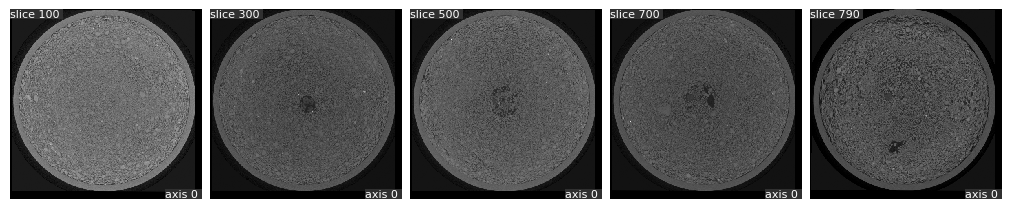

In [5]:
import qim3d

qim3d.viz.slices_grid(volume_uint8, color_map='gray', slice_axis=0, num_slices=5, max_columns=5, slice_positions=[100,300,500,700,790])

In [7]:
slice_idx = volume.shape[0] // 2

In [ ]:
# subvol = np.load("/home/sysadmin/thesis/data/rapids-p/subvolumes/val/volumes/week3_d00_h03_w03.npy")

# slice = subvol[99, :, :]
# plt.imshow(slice, cmap='gray')

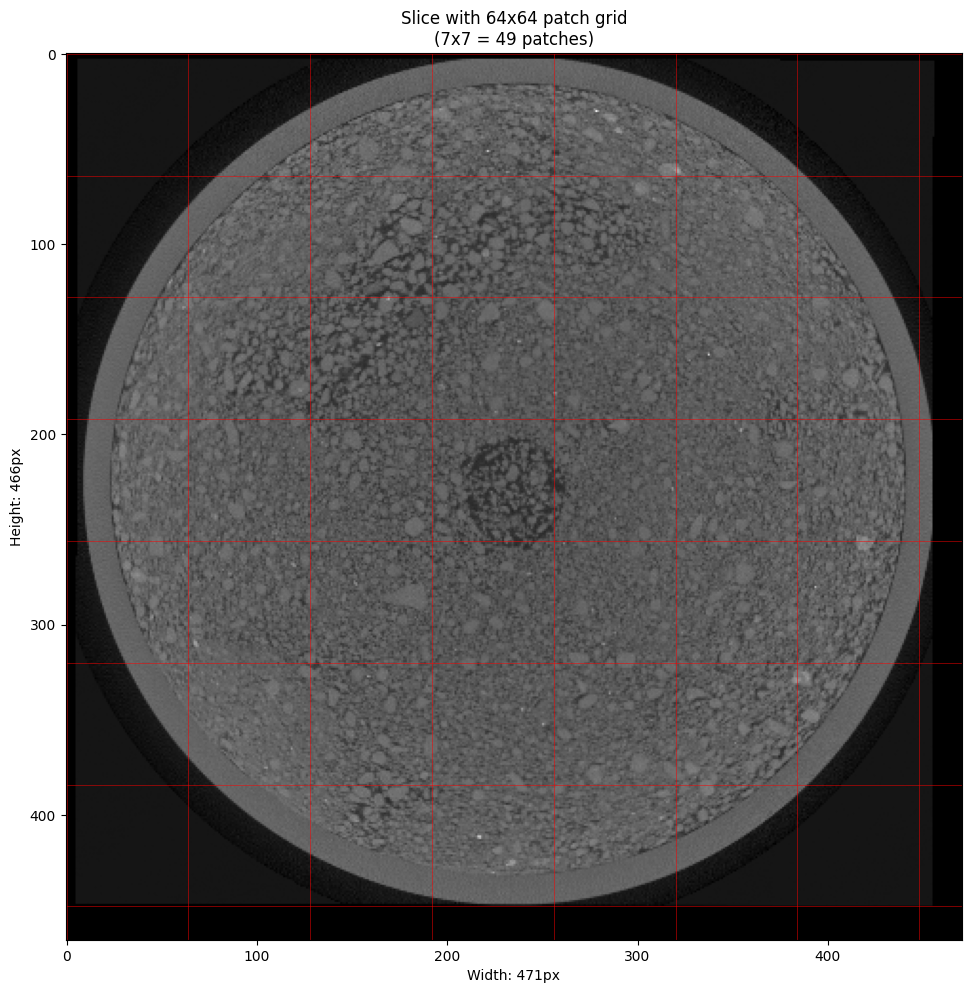

In [8]:
slice = volume_uint8[slice_idx,:,:]
patch_size = 64

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(slice, cmap='gray')

# Draw grid lines
h, w = slice.shape
for x in range(0, w + 1, patch_size):
    ax.axvline(x, color='red', linewidth=0.5, alpha=0.7)
for y in range(0, h + 1, patch_size):
    ax.axhline(y, color='red', linewidth=0.5, alpha=0.7)

ax.set_title(f'Slice with {patch_size}x{patch_size} patch grid\n({w//patch_size}x{h//patch_size} = {(w//patch_size)*(h//patch_size)} patches)')
ax.set_xlabel(f'Width: {w}px')
ax.set_ylabel(f'Height: {h}px')
plt.tight_layout()
plt.show()

Shape: (466, 471), dtype: uint8, min: 0, max: 255


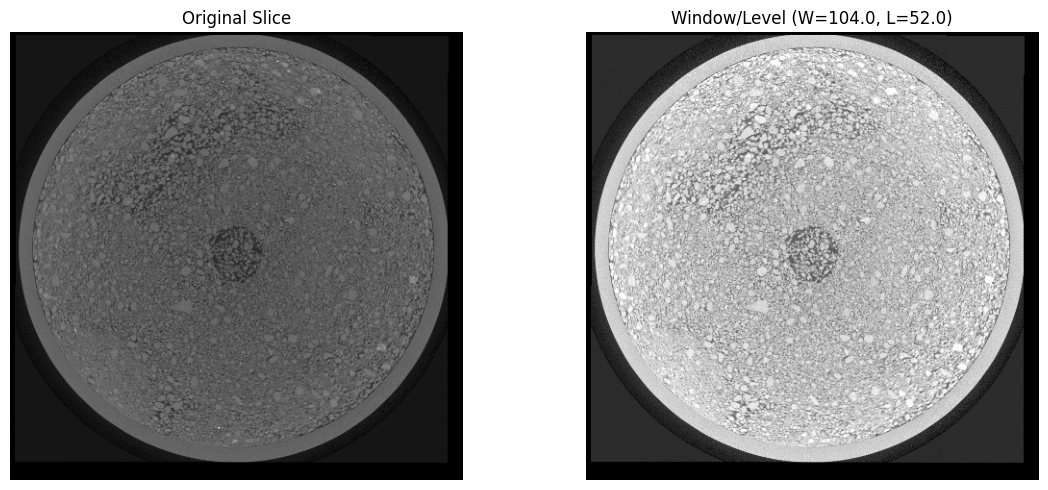

In [ ]:
# ITK-SNAP style window/level contrast adjustment
window = 104.0  # Window width
level = window / 2    # Window center (level)

# Calculate min/max from window/level
wl_min = level - window / 2 
wl_max = level + window / 2  

# Apply window/level: clip and normalize to 0-255
adjusted = np.clip(slice, wl_min, wl_max)
adjusted = ((adjusted - wl_min) / (wl_max - wl_min) * 255).astype(np.uint8)

print(f"Shape: {adjusted.shape}, dtype: {adjusted.dtype}, min: {adjusted.min()}, max: {adjusted.max()}")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(slice, cmap='gray')
axes[0].set_title('Original Slice')
axes[0].axis('off')

axes[1].imshow(adjusted, cmap='gray')
axes[1].set_title(f'Window/Level (W={window}, L={level})')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# # Save as numpy array
# np.save("../data/rapids-p/val/week3-joint-contrast-adjusted.npy", adjusted)
# print("Saved to ../data/rapids-p/val/week3-joint-contrast-adjusted.npy")

In [ ]:
# from scipy.ndimage import zoom

# # Calculate zoom factors for each dimension
# target_shape = (512,)*3
# zoom_factors = [target_shape[i] / data.shape[i] for i in range(3)]

# # Reshape using interpolation
# data_reshaped = zoom(data, zoom_factors, order=1)
# print(f"Original shape: {data.shape}")
# print(f"Reshaped to: {data_reshaped.shape}")

# affine = np.eye(4)
# # Cast to float32 for ITK-SNAP compatibility
# data_nifti_reshaped = nib.Nifti1Image(data_reshaped.astype(np.float32), affine)
# nib.save(data_nifti_reshaped, "codebase/data/ct_like/rapids-p/test.nii")

In [11]:
# data = np.load("/home/sysadmin/thesis/data/rapids-p/subvolumes_100x64x64/train/week2_d00_h00_w04_mask.npy")

# affine = np.eye(4)
# # Cast to float32 for ITK-SNAP compatibility
# data_nifti_reshaped = nib.Nifti1Image(data.astype(np.float32), affine)
# nib.save(data_nifti_reshaped, "test_mask.nii")

## Mask

In [3]:
gt = nib.load(mask_path)
gt_data = gt.get_fdata().astype(np.uint8)

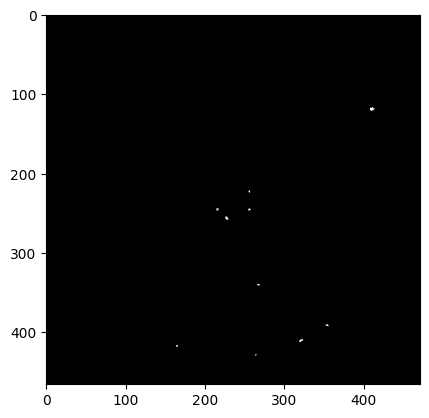

In [10]:
mask_slice = gt_data[slice_idx,:,:]
plt.imshow(mask_slice, cmap='gray')

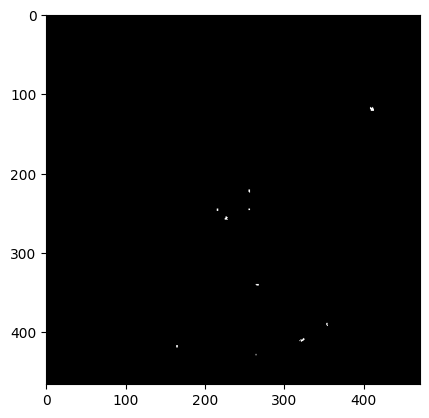

In [18]:
plt.imshow(gt_data[slice_idx+1,:,:], cmap='gray')

In [17]:
slice.flatten()[mask_slice.flatten() == 1]

array([52, 56, 59, 65, 58, 54, 60, 68, 63, 56, 71, 53, 58, 66, 63, 58, 61,
       61, 50, 58, 57, 50, 51, 50, 51, 47, 62, 50, 59, 59, 57, 51, 67, 50,
       52, 62, 53, 47, 59, 60, 56, 55, 57, 53, 60, 49, 61, 61, 49, 55, 51,
       52, 68, 67, 61, 68, 54, 51, 63, 55, 55, 52, 49, 63, 55, 59, 68, 60,
       66, 70, 70, 67, 72, 77, 72], dtype=uint8)

In [ ]:
slice_plus_1 = volume_uint8[slice_idx+1,:,:]

In [13]:
slice_plus_1[gt_data[slice_idx+1,:,:] == 1]

array([60, 58, 57, 62, 60, 58, 57, 60, 67, 63, 55, 64, 64, 60, 56, 62, 60,
       66, 57, 42, 58, 55, 58, 52, 58, 57, 55, 51, 57, 52, 52, 52, 56, 54,
       46, 47, 60, 52, 54, 54, 66, 55, 55, 62, 58, 58, 57, 47, 60, 54, 61,
       48, 68, 64, 65, 61, 54, 61, 65, 64, 59, 55, 58, 50, 55, 54, 58, 57,
       58, 50, 62, 60, 58, 61, 59, 65, 68, 66, 64, 67, 74, 70, 69],
      dtype=uint8)

In [12]:
np.unique(slice[mask_slice == 1])

array([47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65,
       66, 67, 68, 70, 71, 72, 77], dtype=uint8)

### Multi-labeled mask

In [4]:
import nibabel as nib

# Load masks
# gt2 = nib.load("../data/rapids-p/week2-joint-root-class.nii.gz")
pred = nib.load("dqn_slice_based/results/rapids-p/subvolumes/32x32x32/week2+3_dice/0_all_with_future/val_prediction_on_whole_vol.nii.gz")

# gt2_data = gt2.get_fdata().astype(np.uint8)
pred_data = pred.get_fdata().astype(np.uint8)

# Create multi-label mask
multi = np.zeros_like(gt_data, dtype=np.uint8)

multi[gt_data == 1] = 1
multi[pred_data == 1] = 2

# Optional: mark overlap as a separate label
# multi[(gt_data == 1) & (pred_data == 1)] = 3

# Save new multi-label file
multi_img = nib.Nifti1Image(multi, gt.affine, gt.header)
nib.save(multi_img, "multi_label_mask_dice_cont_0.nii.gz")

In [9]:
import nibabel as nib
from pypdf import mult

# Load masks
gt = nib.load("../data/rapids-p/week3-joint-root-class.nii.gz")
unet_pred = nib.load("classical_segmentation/3d/results/unet3d/32x32x32/week3_predicted_mask.nii.gz")
rl_pred = nib.load("dqn_slice_based/results/rapids-p/subvolumes/32x32x32/week2+3_dice/best_val_prediction.nii.gz")

gt_data = gt.get_fdata().astype(np.uint8)
unet_pred_data = unet_pred.get_fdata().astype(np.uint8)
rl_pred_data = rl_pred.get_fdata().astype(np.uint8)

# Create multi-label mask
multi = np.zeros_like(gt_data, dtype=np.uint8)

# Assign labels
multi[gt_data == 1] = 1          # GT week 3
multi[unet_pred_data == 1] = 2        # unet pred
multi[rl_pred_data == 1] = 3        # rl pred

# Optional: mark overlap as a separate label
# multi[(gt_data == 1) & (pred_data == 1)] = 3

# Save new multi-label file
multi_img = nib.Nifti1Image(multi, gt.affine, gt.header)
nib.save(multi_img, "gt_vs_unet_vs_rl.nii.gz")

In [4]:
from scipy import ndimage


x = np.array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])
labeled, num_comp = ndimage.label(x)
labeled

array([0, 1, 1, 0, 0, 2, 2, 2, 0, 0, 0, 3], dtype=int32)

In [4]:
action = np.array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0])
gt =     np.array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0])

vessel_mask = (gt == 1)
weighted_accuracy = np.where(
    vessel_mask,
    - np.abs(action - gt),      # Penalty for missing vessels
    - 0.3 * np.abs(action - gt))

In [5]:
weighted_accuracy

array([-0. ,  0. , -0. , -0. ,  0. ,  0. , -1. ,  0. , -0. , -0.3,  0. ,
       -0. ])

In [6]:
vessel_mask

array([False,  True, False, False,  True,  True,  True,  True, False,
       False,  True, False])


Preset: taproot_deep
Description: Deep taproot with 3D branching
Axiom: F
Rules: {'F': 'FFF[+F][-F][&F]'}
Angle: 25°
Generated string length: 3627
Non-zero voxels: 2084
Voxel occupancy: 0.10%
Saved to 'l_systems_builder/l_systems_3d/examples/3d_lsystem_taproot_deep.npy'

Preset: fibrous_dense
Description: Dense fibrous root network
Axiom: F
Rules: {'F': 'F[+F][&F][-F][^F]F'}
Angle: 30°
Generated string length: 4404
Non-zero voxels: 9042
Voxel occupancy: 0.43%
Saved to 'l_systems_builder/l_systems_3d/examples/3d_lsystem_fibrous_dense.npy'

Available presets:
  plant_basic          - Basic 3D plant with balanced branching
  taproot_simple       - Simple taproot with lateral branches
  taproot_deep         - Deep taproot with 3D branching
  taproot_sparse       - Very deep taproot with sparse laterals
  fibrous_dense        - Dense fibrous root network
  fibrous_shallow      - Shallow spreading fibrous roots
  adventitious         - Adventitious root system
  dichotomous          - Simpl

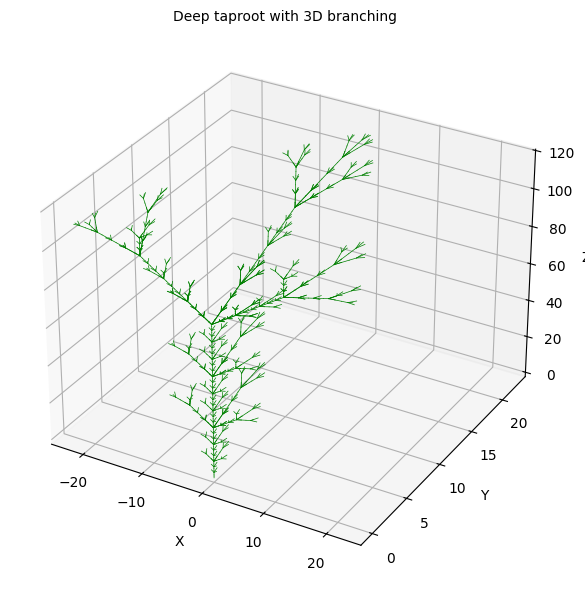

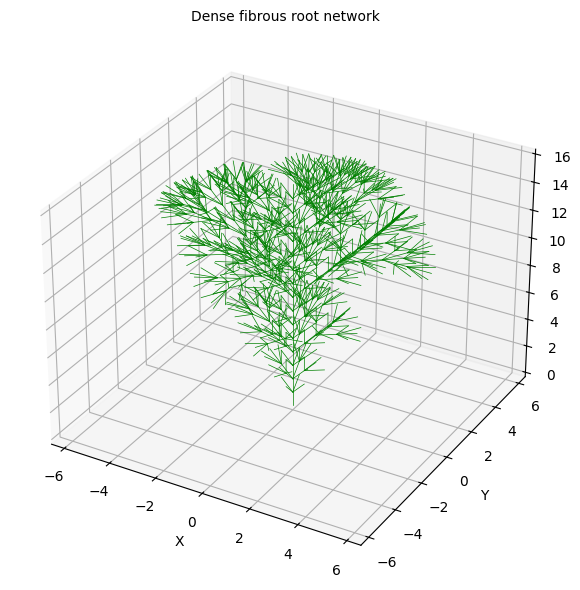

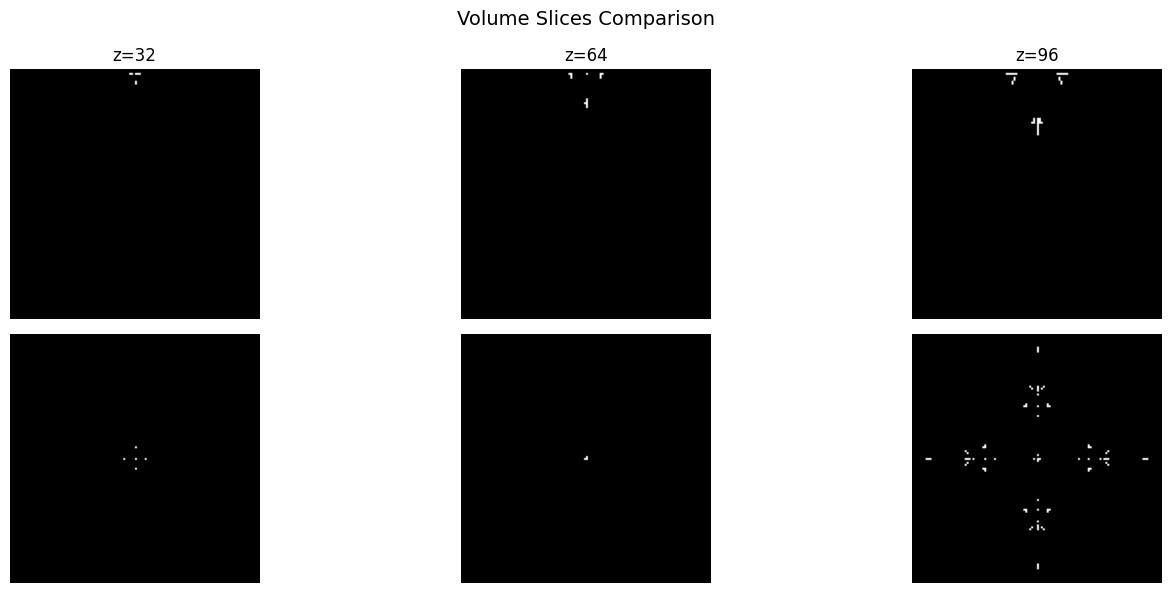

In [4]:
# Here's a complete, runnable Python example of generating and visualizing a 3D L-System using matplotlib for rendering.
# This example uses a simple 3D turtle graphics approach to interpret the L-System rules.

# Python Code: 3D L-System Generator
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting
import math

# -------------------------------
# L-System generation
# -------------------------------
def generate_lsystem(axiom, rules, iterations):
    """Generate an L-system string after a given number of iterations."""
    current = axiom
    for _ in range(iterations):
        next_seq = []
        for ch in current:
            next_seq.append(rules.get(ch, ch))  # Apply rule if exists
        current = "".join(next_seq)
    return current

# -------------------------------
# Predefined L-System configurations
# -------------------------------
LSYSTEM_PRESETS = {
    # Original plant-like structure
    "plant_basic": {
        "axiom": "F",
        "rules": {"F": "F/[+F]F&[-F]F"},
        "angle": 25,
        "description": "Basic 3D plant with balanced branching"
    },
    
    # Taproot systems (main vertical root with laterals)
    "taproot_simple": {
        "axiom": "F",
        "rules": {"F": "FF[+F][-F]"},
        "angle": 30,
        "description": "Simple taproot with lateral branches"
    },
    "taproot_deep": {
        "axiom": "F",
        "rules": {"F": "FFF[+F][-F][&F]"},
        "angle": 25,
        "description": "Deep taproot with 3D branching"
    },
    "taproot_sparse": {
        "axiom": "F",
        "rules": {"F": "FFFF[+F][-F]"},
        "angle": 35,
        "description": "Very deep taproot with sparse laterals"
    },
    
    # Fibrous root systems (dense, spreading)
    "fibrous_dense": {
        "axiom": "F",
        "rules": {"F": "F[+F][&F][-F][^F]F"},
        "angle": 30,
        "description": "Dense fibrous root network"
    },
    "fibrous_shallow": {
        "axiom": "F",
        "rules": {"F": "F[+F][-F]F[&F][^F]"},
        "angle": 45,
        "description": "Shallow spreading fibrous roots"
    },
    
    # Adventitious roots (multiple starting points)
    "adventitious": {
        "axiom": "F[+F][-F]",
        "rules": {"F": "FF[+F][-F][/F]"},
        "angle": 30,
        "description": "Adventitious root system"
    },
    
    # Dichotomous branching (forking)
    "dichotomous": {
        "axiom": "F",
        "rules": {"F": "F[+F][-F]"},
        "angle": 30,
        "description": "Simple dichotomous forking"
    },
    "dichotomous_3d": {
        "axiom": "F",
        "rules": {"F": "F[+&F][-^F]"},
        "angle": 25,
        "description": "3D dichotomous branching"
    },
    
    # Herringbone pattern
    "herringbone": {
        "axiom": "F",
        "rules": {"F": "F[-F]FF[+F]F"},
        "angle": 35,
        "description": "Herringbone branching pattern"
    },
    "herringbone_3d": {
        "axiom": "F",
        "rules": {"F": "F[-F]F[&F]F[+F]F"},
        "angle": 30,
        "description": "3D herringbone pattern"
    },
    
    # Tree-like structures
    "tree_binary": {
        "axiom": "F",
        "rules": {"F": "FF[+F][−F]"},
        "angle": 25,
        "description": "Binary tree structure"
    },
    "tree_ternary": {
        "axiom": "F",
        "rules": {"F": "F[+F]F[-F]F"},
        "angle": 20,
        "description": "Ternary branching tree"
    },
    "tree_bushy": {
        "axiom": "F",
        "rules": {"F": "F[+F][&F]F[-F][^F]F"},
        "angle": 22,
        "description": "Bushy tree with many branches"
    },
    
    # Spiral patterns
    "spiral": {
        "axiom": "F",
        "rules": {"F": "F[+F]/F[-F]\\F"},
        "angle": 30,
        "description": "Spiral growth pattern"
    },
    "helix": {
        "axiom": "F",
        "rules": {"F": "F/[+F]\\[-F]F"},
        "angle": 25,
        "description": "Helical growth"
    },
    
    # Coral-like structures
    "coral_branching": {
        "axiom": "F",
        "rules": {"F": "FF[+F][+F][-F][-F]"},
        "angle": 25,
        "description": "Coral-like branching"
    },
    "coral_3d": {
        "axiom": "F",
        "rules": {"F": "F[+F][&F]F[-F][^F]"},
        "angle": 30,
        "description": "3D coral structure"
    },
    
    # Fern-like patterns
    "fern": {
        "axiom": "X",
        "rules": {"X": "F+[[X]-X]-F[-FX]+X", "F": "FF"},
        "angle": 25,
        "description": "Fern-like frond pattern"
    },
    
    # Sparse long roots
    "root_long_sparse": {
        "axiom": "F",
        "rules": {"F": "FFFFF[+F][-F]"},
        "angle": 30,
        "description": "Very long roots with sparse branching"
    },
    "root_asymmetric": {
        "axiom": "F",
        "rules": {"F": "FF[+F]FFF[-F]F"},
        "angle": 35,
        "description": "Asymmetric root branching"
    },
    
    # Complex 3D patterns
    "complex_3d_a": {
        "axiom": "F",
        "rules": {"F": "F[+F&F]F[-F^F]F"},
        "angle": 25,
        "description": "Complex 3D pattern A"
    },
    "complex_3d_b": {
        "axiom": "F",
        "rules": {"F": "F[/+F][\\-F]F[&F][^F]"},
        "angle": 28,
        "description": "Complex 3D pattern B"
    },
    
    # Vine-like structures
    "vine": {
        "axiom": "F",
        "rules": {"F": "F[+F]F[-F][F]"},
        "angle": 20,
        "description": "Vine-like growth"
    },
    "vine_3d": {
        "axiom": "F",
        "rules": {"F": "F/[+F]F\\[-F]F"},
        "angle": 22,
        "description": "3D vine structure"
    },
    
    # Lightning/crack patterns
    "lightning": {
        "axiom": "F",
        "rules": {"F": "F[++F][--F]F"},
        "angle": 15,
        "description": "Lightning bolt pattern"
    },
    
    # Alternating branching
    "alternating": {
        "axiom": "F",
        "rules": {"F": "F[+F]F", "F": "F[-F]F"},  # Note: will use last rule
        "angle": 30,
        "description": "Alternating branch sides"
    },
    "alternating_3d": {
        "axiom": "A",
        "rules": {"A": "F[+A]FB", "B": "F[-B]FA", "F": "FF"},
        "angle": 30,
        "description": "Alternating 3D branches"
    },
}

# -------------------------------
# 3D Turtle Interpreter
# -------------------------------
def draw_lsystem_3d(instructions, angle, step):
    """Interpret L-system instructions in 3D space."""
    # Turtle state: position, heading, left, up vectors
    pos = np.array([0.0, 0.0, 0.0])
    heading = np.array([0.0, 0.0, 1.0])  # Forward direction along +Z (will grow downward)
    left = np.array([-1.0, 0.0, 0.0])
    up = np.array([0.0, 1.0, 0.0])

    stack = []
    lines = []

    def rotate(vec, axis, theta):
        """Rotate vector vec around axis by theta degrees."""
        axis = axis / np.linalg.norm(axis)
        theta_rad = math.radians(theta)
        return (vec * math.cos(theta_rad) +
                np.cross(axis, vec) * math.sin(theta_rad) +
                axis * np.dot(axis, vec) * (1 - math.cos(theta_rad)))

    for cmd in instructions:
        if cmd == "F":  # Move forward and draw
            new_pos = pos + heading * step
            lines.append((pos.copy(), new_pos.copy()))
            pos = new_pos
        elif cmd == "f":  # Move forward without drawing
            pos += heading * step
        elif cmd == "+":  # Turn left around up vector
            heading = rotate(heading, up, angle)
            left = rotate(left, up, angle)
        elif cmd == "-":  # Turn right around up vector
            heading = rotate(heading, up, -angle)
            left = rotate(left, up, -angle)
        elif cmd == "&":  # Pitch down
            heading = rotate(heading, left, angle)
            up = rotate(up, left, angle)
        elif cmd == "^":  # Pitch up
            heading = rotate(heading, left, -angle)
            up = rotate(up, left, -angle)
        elif cmd == "\\":  # Roll left
            left = rotate(left, heading, angle)
            up = rotate(up, heading, angle)
        elif cmd == "/":  # Roll right
            left = rotate(left, heading, -angle)
            up = rotate(up, heading, -angle)
        elif cmd == "|":  # Turn 180 degrees
            heading = -heading
            left = -left
        elif cmd == "[":  # Save state
            stack.append((pos.copy(), heading.copy(), left.copy(), up.copy()))
        elif cmd == "]":  # Restore state
            pos, heading, left, up = stack.pop()

    return lines

# -------------------------------
# Convert line segments to voxel volume
# -------------------------------
def draw_line_3d_volume(volume, p1, p2, thickness=1):
    """Draw a 3D line in the volume using DDA algorithm."""
    D, H, W = volume.shape
    
    dx = p2[0] - p1[0]
    dy = p2[1] - p1[1]
    dz = p2[2] - p1[2]
    
    steps = int(max(abs(dx), abs(dy), abs(dz))) + 1
    if steps == 0:
        return
    
    x_inc = dx / steps
    y_inc = dy / steps
    z_inc = dz / steps
    
    x, y, z = p1[0], p1[1], p1[2]
    
    for _ in range(steps + 1):
        ix, iy, iz = int(round(x)), int(round(y)), int(round(z))
        
        for dz_off in range(-thickness + 1, thickness):
            for dy_off in range(-thickness + 1, thickness):
                for dx_off in range(-thickness + 1, thickness):
                    if dx_off**2 + dy_off**2 + dz_off**2 <= thickness**2:
                        vx = ix + dx_off
                        vy = iy + dy_off
                        vz = iz + dz_off
                        if 0 <= vx < W and 0 <= vy < H and 0 <= vz < D:
                            volume[vz, vy, vx] = 1
        
        x += x_inc
        y += y_inc
        z += z_inc

def segments_to_volume(segments, volume_shape=(64, 64, 64), thickness=1):
    """Convert line segments to a voxel volume.
    
    Structure grows along Z-axis with starting point at z=0 (upper-most slice).
    Volume shape is (D, H, W) = (depth, height, width).
    """
    D, H, W = volume_shape
    volume = np.zeros(volume_shape, dtype=np.uint8)
    
    if len(segments) == 0:
        return volume
    
    # Collect all points from segments
    all_points = []
    for start, end in segments:
        all_points.append(start)
        all_points.append(end)
    all_points = np.array(all_points)
    
    # Get bounds
    min_vals = all_points.min(axis=0)
    max_vals = all_points.max(axis=0)
    
    # Add margin
    margin = 2
    
    # Scale and translate points to fit in volume
    # X -> W (width), Y -> H (height), Z -> D (depth)
    scaled_segments = []
    for start, end in segments:
        scaled_start = np.zeros(3)
        scaled_end = np.zeros(3)
        
        for i, (s, e) in enumerate(zip(start, end)):
            range_val = max_vals[i] - min_vals[i]
            if range_val < 1e-8:
                range_val = 1.0
            
            if i == 0:  # X -> W
                scaled_start[i] = (s - min_vals[i]) / range_val * (W - 1 - 2*margin) + margin
                scaled_end[i] = (e - min_vals[i]) / range_val * (W - 1 - 2*margin) + margin
            elif i == 1:  # Y -> H
                scaled_start[i] = (s - min_vals[i]) / range_val * (H - 1 - 2*margin) + margin
                scaled_end[i] = (e - min_vals[i]) / range_val * (H - 1 - 2*margin) + margin
            else:  # Z -> D (depth grows along Z, starting at z=0)
                scaled_start[i] = (s - min_vals[i]) / range_val * (D - 1 - 2*margin) + margin
                scaled_end[i] = (e - min_vals[i]) / range_val * (D - 1 - 2*margin) + margin
        
        scaled_segments.append((scaled_start, scaled_end))
    
    # Draw lines
    for start, end in scaled_segments:
        draw_line_3d_volume(volume, start, end, thickness)
    
    return volume

# -------------------------------
# Generate 2 L-systems for comparison
# -------------------------------
# Choose two presets to compare
preset_names = ["taproot_deep", "fibrous_dense"]  # Change these to compare different presets
iterations = 4
step = 1.0
volume_shape = (128, 128, 128)

# Store results for both presets
results = []

for preset_name in preset_names:
    preset = LSYSTEM_PRESETS[preset_name]
    
    print(f"\n{'='*50}")
    print(f"Preset: {preset_name}")
    print(f"Description: {preset['description']}")
    print(f"Axiom: {preset['axiom']}")
    print(f"Rules: {preset['rules']}")
    print(f"Angle: {preset['angle']}°")
    
    # Generate L-system string
    lsystem_str = generate_lsystem(preset["axiom"], preset["rules"], iterations)
    print(f"Generated string length: {len(lsystem_str)}")
    
    # Interpret and get line segments
    segments = draw_lsystem_3d(lsystem_str, preset["angle"], step)
    
    # Convert to voxel volume
    volume = segments_to_volume(segments, volume_shape=volume_shape, thickness=1)
    
    print(f"Non-zero voxels: {volume.sum()}")
    print(f"Voxel occupancy: {volume.sum() / volume.size * 100:.2f}%")
    
    # Save as numpy file
    filename = f"l_systems_builder/l_systems_3d/examples/3d_lsystem_{preset_name}.npy"
    np.save(filename, volume)
    print(f"Saved to '{filename}'")
    
    results.append({
        "name": preset_name,
        "preset": preset,
        "segments": segments,
        "volume": volume
    })

# -------------------------------
# Plot 3D structures side-by-side
# -------------------------------


for i, res in enumerate(results):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    for start, end in res["segments"]:
        xs, ys, zs = zip(start, end)
        ax.plot(xs, ys, zs, color="green", linewidth=0.5)
    
    ax.set_title(f"{res['preset']['description']}", fontsize=10)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    plt.tight_layout()
    plt.savefig(f"l_systems_builder/l_systems_3d/examples/3d_lsystem_{res['name']}_3d_plot.png", dpi=300)

# -------------------------------
# Visualize slices side-by-side
# -------------------------------
slice_indices = [volume_shape[0]//4, volume_shape[0]//2, 3*volume_shape[0]//4]

fig, axes = plt.subplots(2, 3, figsize=(15, 6))

for row, res in enumerate(results):
    for col, z_idx in enumerate(slice_indices):
        axes[row, col].imshow(res["volume"][z_idx], cmap='gray')
        if row == 0:
            axes[row, col].set_title(f'z={z_idx}')
        axes[row, col].axis('off')
    
    # Add row label
    axes[row, 0].set_ylabel(res["name"], fontsize=10, rotation=0, ha='right', va='center')

plt.suptitle('Volume Slices Comparison', fontsize=14)
plt.tight_layout()
plt.savefig("l_systems_builder/l_systems_3d/examples/volume_slices_comparison.png", dpi=300)
# -------------------------------
# Print all available presets
# -------------------------------
print("\n" + "="*50)
print("Available presets:")
print("="*50)
for name, config in LSYSTEM_PRESETS.items():
    print(f"  {name:20s} - {config['description']}")

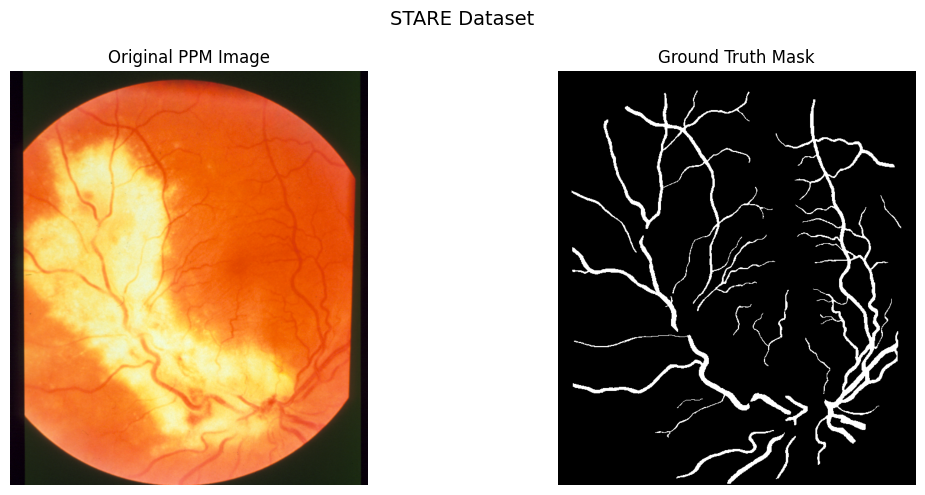

In [5]:
# Plot DRIVE training sample with corresponding mask
import cv2
import matplotlib.pyplot as plt

drive_train_path = "/home/razva/DTU/thesis/data/STARE/train"

# Load a training image and its mask
img_path = f"{drive_train_path}/images/im0044.ppm"
mask_path = f"{drive_train_path}/segm/im0044.ah.ppm"

img = cv2.imread(img_path, cv2.IMREAD_COLOR_RGB)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(img)
axes[0].set_title('Original PPM Image')
axes[0].axis('off')

axes[1].imshow(mask, cmap='gray')
axes[1].set_title('Ground Truth Mask')
axes[1].axis('off')

plt.suptitle('STARE Dataset', fontsize=14)
plt.tight_layout()
plt.show()